Datu ielasīšana, priekšapstrāde un sākotnējā atspoguļošana
---



In [1]:
#Visu datu ielasīšanai, priekšapstrādei un vizualizācijai nepieciešamo bibliotēku pievienošana
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Pieslēgšanas Google kontam
#from google.colab import drive
#drive.mount('/content/gdrive')
#Tiek iegūts diska saturs
#import os
#os.chdir("/content/gdrive/MyDrive/Colab Notebooks")
#!ls
#Tiek nolasīts datu kopas fails
#datu_kopa = pd.read_csv('filtered_heart.csv')
 datu_kopa = pd.read_csv('/workspaces/MIP_projekts2/dataset/filtered_heart.csv')
#Tiek atspoguļoti datu kopas kolonu datu tipi
print(datu_kopa.dtypes)

Mounted at /content/gdrive
 filtered_heart.csv
 heart.csv
 Medicaldataset.csv
'Pārraudzītā_mašīnmācīšanās (1) (1) (1).ipynb'
'Pārraudzītā_mašīnmācīšanās (1) (1).ipynb'
'Pārraudzītā_mašīnmācīšanās (1).ipynb'
 Pārraudzītā_mašīnmācīšanās-2.1.ipynb
'Pārraudzītā_mašīnmācīšanās-2 (1).ipynb'
 Pārraudzītā_mašīnmācīšanās-2.ipynb
'Pārraudzītā_mašīnmācīšanās (2).ipynb'
'Pārraudzītā_mašīnmācīšanās (3).ipynb'
 Pārraudzītā_mašīnmācīšanās.ipynb
 penguins_size.csv
'Копия блокнота "Pārraudzītā_mašīnmācīšanās (1) (1).ipynb"'
'Копия блокнота "Pārraudzītā_mašīnmācīšanās-2.ipynb"'
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


### Datu tipu salāgošana

In [3]:
#Tā kā kategoriskiem atribūtiem tiek norādīts tips "object", tas tiek mainīts uz "category"
datu_kopa["Sex"] = datu_kopa["Sex"].astype('category')
datu_kopa["ChestPainType"] = datu_kopa["ChestPainType"].astype('category')
datu_kopa["RestingECG"] = datu_kopa["RestingECG"].astype('category')
datu_kopa["ExerciseAngina"] = datu_kopa["ExerciseAngina"].astype('category')
datu_kopa["ST_Slope"] = datu_kopa["ST_Slope"].astype('category')
#Tiek izvadīti pirmie 7 ieraksti datu kopā
print(datu_kopa.head(7))

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up           

In [4]:
#Tiek izveidotas jaunas kolonas kategoriskajiem atribūtiem un to vērtības tiek pārvērstas par skaitliskām vērtībām
datu_kopa["Sex_cat"] = datu_kopa["Sex"].cat.codes
datu_kopa["ChestPainType_cat"] = datu_kopa["ChestPainType"].cat.codes
datu_kopa["RestingECG_cat"] = datu_kopa["RestingECG"].cat.codes
datu_kopa["ExerciseAngina_cat"] = datu_kopa["ExerciseAngina"].cat.codes
datu_kopa["ST_Slope_cat"] = datu_kopa["ST_Slope"].cat.codes
#Tiek atspoguļoti datu kopas kolonu datu tipi
print(datu_kopa.dtypes)
#Tiek izvadīti pirmie 7 ieraksti datu kopā
print(datu_kopa.head(7))
# a = datu_kopa
# print(a)

Age                      int64
Sex                   category
ChestPainType         category
RestingBP                int64
Cholesterol              int64
FastingBS                int64
RestingECG            category
MaxHR                    int64
ExerciseAngina        category
Oldpeak                float64
ST_Slope              category
HeartDisease             int64
Sex_cat                   int8
ChestPainType_cat         int8
RestingECG_cat            int8
ExerciseAngina_cat        int8
ST_Slope_cat              int8
dtype: object
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195      

###Informācijas par datu kopu izvade un analīze

In [5]:
#Tālākajam darbam tiek atmesti kategorijas tipa atribūti
samazinata_datu_kopa = datu_kopa[["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak", "HeartDisease","Sex_cat","ST_Slope_cat","ExerciseAngina_cat","RestingECG_cat","ChestPainType_cat"]]
#Tiek izvadīti dati par datu kopu
print(samazinata_datu_kopa.describe())
print(samazinata_datu_kopa.info())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  746.000000  746.000000   746.000000  746.000000  746.000000   
mean    52.882038  133.022788   244.635389    0.167560  140.226542   
std      9.505888   17.282750    59.153524    0.373726   24.524107   
min     28.000000   92.000000    85.000000    0.000000   69.000000   
25%     46.000000  120.000000   207.250000    0.000000  122.000000   
50%     54.000000  130.000000   237.000000    0.000000  140.000000   
75%     59.000000  140.000000   275.000000    0.000000  160.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease     Sex_cat  ST_Slope_cat  ExerciseAngina_cat  \
count  746.000000    746.000000  746.000000    746.000000          746.000000   
mean     0.901609      0.477212    0.756032      1.410188            0.384718   
std      1.072861      0.499816    0.429762      0.598076            0.486855   
min     -0.100000      0.000000    0.000000  

### Datu normalizācija

In [6]:
#Četriem atribūtiem tiek veikta datu normalizācija, lai dati būtu uzskatāmaki "Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"
darba_datu_kopa=samazinata_datu_kopa.copy()
#darba_datu_kopa['Age']=(darba_datu_kopa['Age']-darba_datu_kopa['Age'].min())/(darba_datu_kopa['Age'].max()-darba_datu_kopa['Age'].min())
darba_datu_kopa['RestingBP']=(darba_datu_kopa['RestingBP']-darba_datu_kopa['RestingBP'].min())/(darba_datu_kopa['RestingBP'].max()-darba_datu_kopa['RestingBP'].min())
darba_datu_kopa['Cholesterol']=(darba_datu_kopa['Cholesterol']-darba_datu_kopa['Cholesterol'].min())/(darba_datu_kopa['Cholesterol'].max()-darba_datu_kopa['Cholesterol'].min())
#darba_datu_kopa['FastingBS']=(darba_datu_kopa['FastingBS']-darba_datu_kopa['FastingBS'].min())/(darba_datu_kopa['FastingBS'].max()-darba_datu_kopa['FastingBS'].min())
darba_datu_kopa['MaxHR']=(darba_datu_kopa['MaxHR']-darba_datu_kopa['MaxHR'].min())/(darba_datu_kopa['MaxHR'].max()-darba_datu_kopa['MaxHR'].min())
darba_datu_kopa['Oldpeak']=(darba_datu_kopa['Oldpeak']-darba_datu_kopa['Oldpeak'].min())/(darba_datu_kopa['Oldpeak'].max()-darba_datu_kopa['Oldpeak'].min())
#darba_datu_kopa['HeartDisease']=(darba_datu_kopa['HeartDisease']-darba_datu_kopa['HeartDisease'].min())/(darba_datu_kopa['HeartDisease'].max()-darba_datu_kopa['HeartDisease'].min())
print(datu_kopa.head(10))
print(datu_kopa.describe())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Sex_cat  ChestPainType_cat  \
0              N      0.0   

Datu un faktoru vērtību vizualizācija
---

### Vērtību attēlojums

<Axes: >

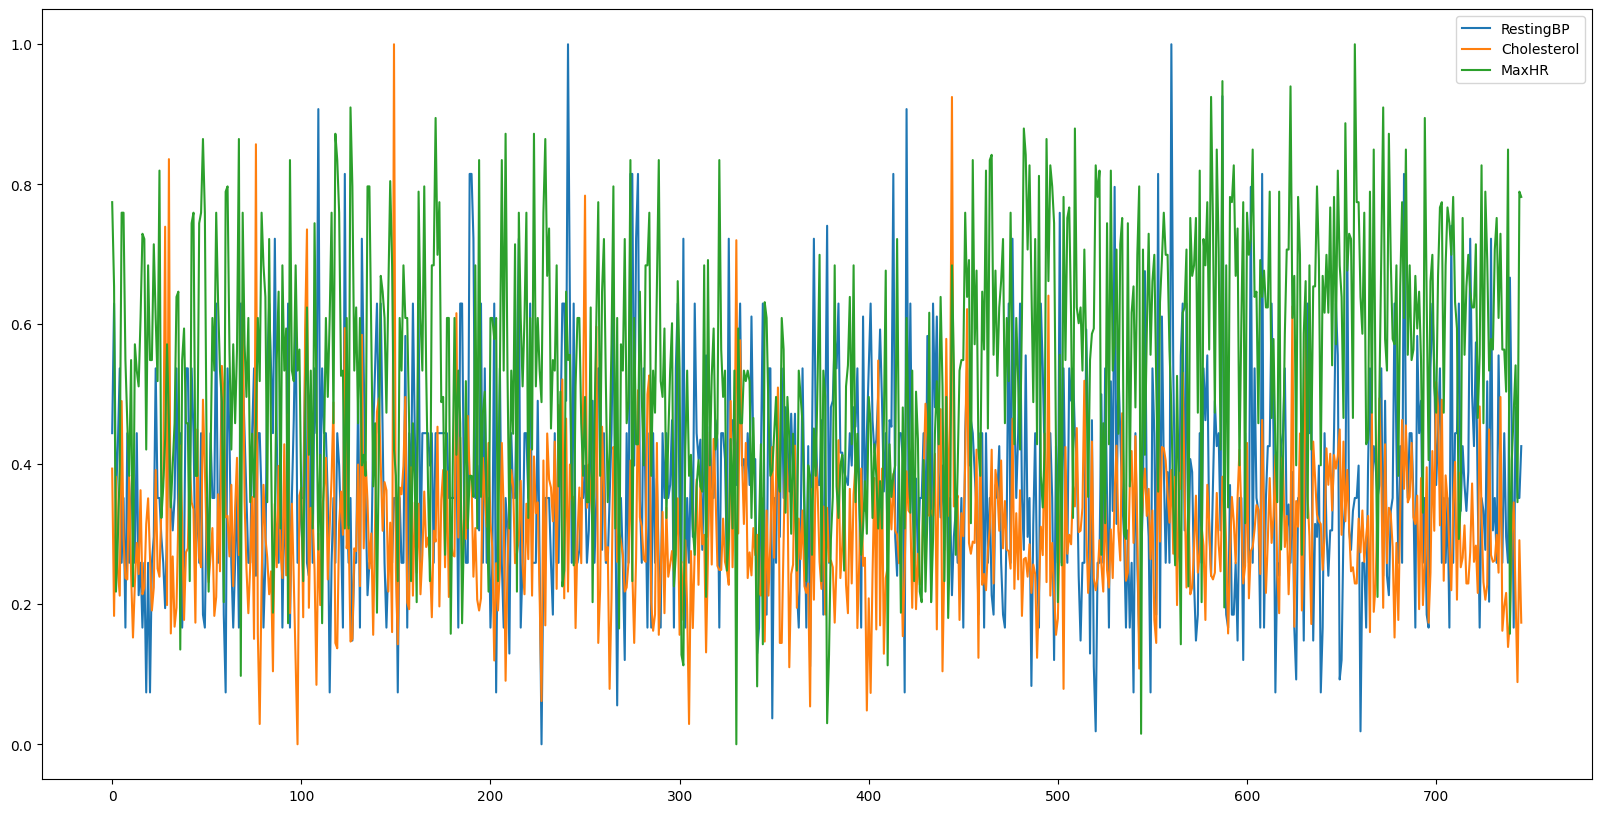

In [7]:
#Vērtību vizualizācijai tiek atlasīti tikai atribūti ar skaitliskām vērtībām nepārtrauktajā skalā
darba_datu_kopa_vizualizacijai = darba_datu_kopa[["RestingBP","Cholesterol","MaxHR"]]
#Vērtību attēlojuma izvade
darba_datu_kopa_vizualizacijai.plot(figsize=(20,10))

Vērtību attēlojums ļauj veikt šādus secinājumus:


### Histogrammu analīze

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>,
        <Axes: title={'center': 'Sex_cat'}>,
        <Axes: title={'center': 'ST_Slope_cat'}>],
       [<Axes: title={'center': 'ExerciseAngina_cat'}>,
        <Axes: title={'center': 'RestingECG_cat'}>,
        <Axes: title={'center': 'ChestPainType_cat'}>]], dtype=object)

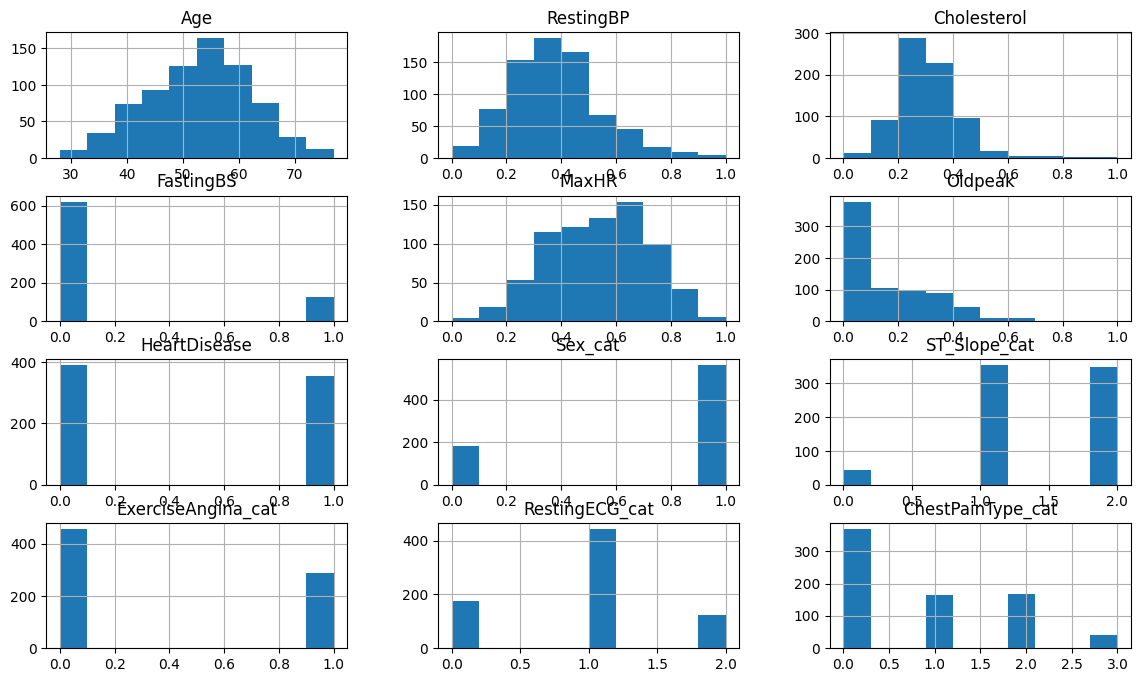

In [8]:
#Datu kopas atribūtu histogrammu izvade
darba_datu_kopa.hist(figsize=(14,8))

Histogrammās redzam, ka

### Izkliedes diagrammu analīze (Atribūtu savstarpējie sadalījumi)


Text(0.5, 0.98, 'Faktoru savstarpējās attiecības')

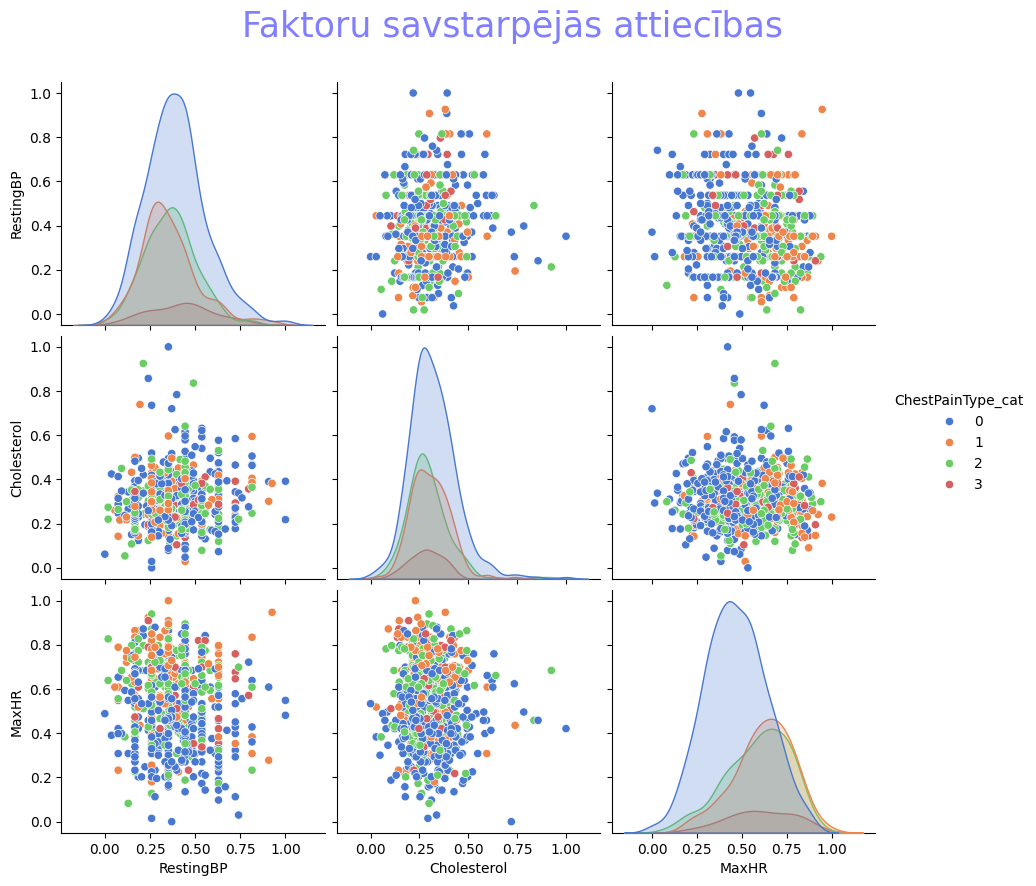

In [9]:
#Izveidojam atribūtu pāru grafiku, norādot tā kopējo izmēru  un krāsu shēmu
paru_grafiks = sns.pairplot(darba_datu_kopa,hue='ChestPainType_cat',palette="muted",height=3,vars=['RestingBP','Cholesterol','MaxHR'],kind='scatter')
# Papildus atstarpe, lai virsraksts tiktu attēlots pareizi
plt.subplots_adjust(top=0.9)
#Norādām virsrakstu grafikam
paru_grafiks.fig.suptitle('Faktoru savstarpējās attiecības',fontsize=25,color='b',alpha=0.5)

!


### Atribūtu savstarpējā korelācija

<Axes: >

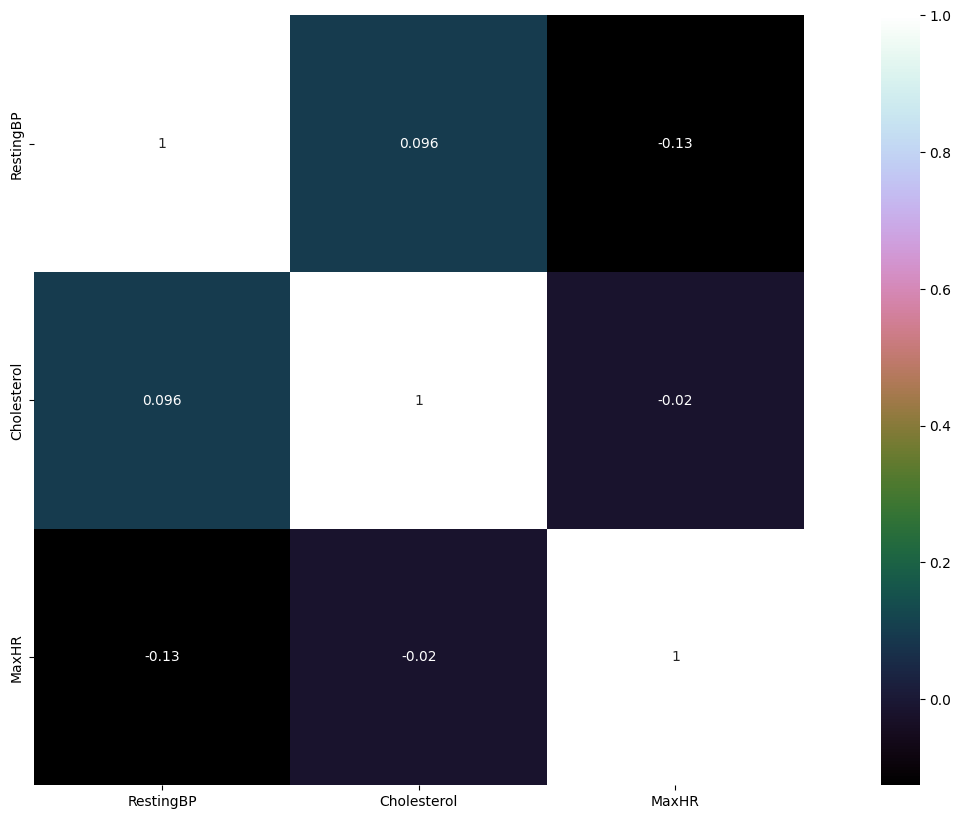

In [10]:
#Tiek izveidota korelācijas matrica, tajā atspoguļojot korelācijas koeficientu skaitliskiem atribūtiem
korelacijas_matrica=darba_datu_kopa_vizualizacijai.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(korelacijas_matrica,vmax=1,square=True,annot=True,cmap='cubehelix')

K-vidējo algoritms
---


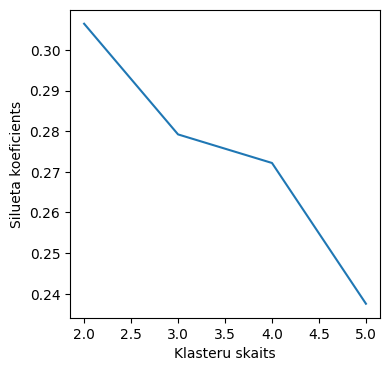

In [ ]:
#algoritma izmantošanai nepieciešamo bibliotēku ielāde
from sklearn.cluster import KMeans
from sklearn import metrics
#tiek atlasīta datu kopa klasterizācijas uzdevumam, ietverot tajā 3 atribūtus no normalizētas datu kopas
darba_datu_kopa_klasterizacijai_3_pazimes = darba_datu_kopa[['RestingBP','Cholesterol','MaxHR']]
#Silueta koeficienta vērtību saraksta izveide
Silueta_koeficients = []
#tiek realizēts cikls ar 6 iterācijām (6 dažādām klasteru skaita vērtībām)
#šajā gadījumā 1 klasteris netiek apskatīts, jo tam nav jēgas silueta koeficienta aprēķinā
for i in range(2,6):
   #Kmeans klasterizācijas modeļa izveide, kur veidojamo klasteru skaits (n_clusters) ir vienāds ar cikla iterācijas numuru (2, 3..)
   kmeans_modelis = KMeans(n_clusters = i, init = "k-means++")
   #Kmeans modeļa apmācība, izmantojot atlasīto datu kopu ar trim atribūtiem
   kmeans_modelis.fit(darba_datu_kopa_klasterizacijai_3_pazimes)
   #Silueta koeficients tiek aprēķināts, ņemot par pamatu iepriekš atlasīto datu kopu ar trim atribūtiem no normalizētas datu kopas
   Silueta_koeficients.append(metrics.silhouette_score(darba_datu_kopa_klasterizacijai_3_pazimes, kmeans_modelis.labels_))
#iegūto rezultātu vizuālā attēlošana
plt.figure(figsize=(4,4))
plt.plot(range(2,6), Silueta_koeficients)
plt.xlabel('Klasteru skaits')
plt.ylabel('Silueta koeficients')
plt.show()

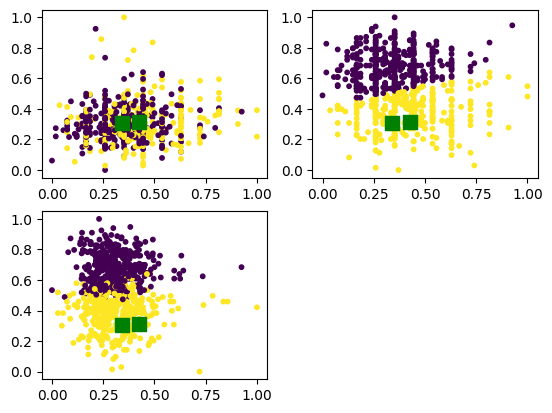

In [ ]:
#lai izvadītu kalsterizācijas rezultātus, tiek pievienota papildu bibliotēka
import matplotlib.pyplot as plt
#tiek izveidots un apmācīts K-vidējo algoritma nodelis ar 2 klasteriem, izmantojot iepriekš izveidoto datu apakškopu ar 3 atribūtiem
kmeans_modelis = KMeans(n_clusters=2, init = "k-means++").fit(darba_datu_kopa_klasterizacijai_3_pazimes)
#tiek iegūti klasteru centri
centroids = kmeans_modelis.cluster_centers_
#izveidojam prognozes datu objektu piederībai klasteriem
ypred = kmeans_modelis.predict(darba_datu_kopa_klasterizacijai_3_pazimes)
#atspoguļojam klasterizācijas rezultātus izkliedes diagrammās
plt.subplot(2,2,1)                            # Izveido attēlu matricā (2 x 2), indekss sākas ar 1 kreisajā augšējā stūrī
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['RestingBP'], darba_datu_kopa_klasterizacijai_3_pazimes['Cholesterol'], s = 10, c = ypred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.subplot(2,2,2)                            # Izveido nākošo attēlu matricā ar indeksu 2
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['RestingBP'], darba_datu_kopa_klasterizacijai_3_pazimes['MaxHR'], s = 10, c = ypred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.subplot(2,2,3)                            # Izveido nākošo attēlu matricā ar indeksu 2
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['Cholesterol'], darba_datu_kopa_klasterizacijai_3_pazimes['MaxHR'], s = 10, c = ypred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.show()

Hierarhiskā aglomeratīvā klasterēšana
---

In [ ]:
#algoritma izmantošanai nepieciešamās bibliotēkas ielāde
from sklearn.cluster import AgglomerativeClustering
#algoritma modeļa izveide, par pamatu izmantojot datu apakškopu ar 3 atribūtiem
clustering = AgglomerativeClustering().fit(darba_datu_kopa_klasterizacijai_3_pazimes)

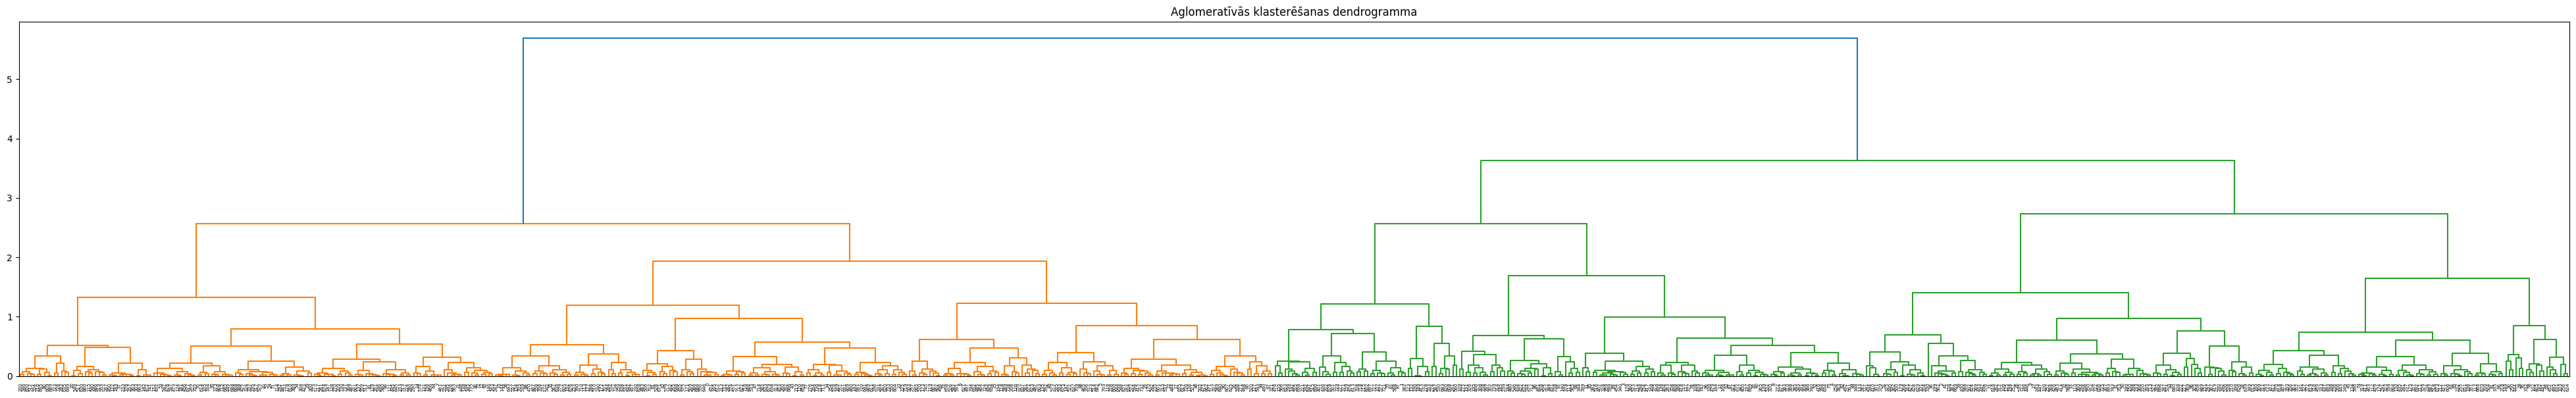

In [ ]:
#dendrogrammas atspoguļošanai nepieciešamās bibliotēkas ielāde
import scipy.cluster.hierarchy as shc
#dendrogrammas izvade, par pamatu izmantojot saistīšanas metodi "ward"
plt.figure(figsize =(50, 7))
plt.title('Aglomeratīvās klasterēšanas dendrogramma')
Dendrogram = shc.dendrogram((shc.linkage(darba_datu_kopa_klasterizacijai_3_pazimes, method ='ward')))

Mākslīgo neironu tīkli
---

In [ ]:
#bibliotēkas ielāde datu sadalīšanai apmācības un testa datu kopās
from sklearn.model_selection import train_test_split
#atsevišķajā mainīgajā saglabājam datu objektu izeju vērtības, t.i. "pingvīnu sugas"
izejas = darba_datu_kopa['ChestPainType_cat']
#uzdodam datu objektu proporciju, kuri veidos apmācības datu kopu (70%)
apmacibas_datu_proporcija = 0.7
#tiek veikta datu kopas sadalīšana testa un apmācības kopā, izmantojot nejaušu sadalījumu ar attecību 70:30
X_apmacibas, X_testa, y_apmacibas, y_testa = train_test_split(darba_datu_kopa_klasterizacijai_3_pazimes, izejas, test_size=1.0 - apmacibas_datu_proporcija, random_state=42)

####**1.modelis** - 2 slāņi ar 100 neironiem katrā

In [ ]:
#algoritma izmantošanai nepieciešamās bibliotēkas ielāde
from sklearn.neural_network import MLPClassifier
#izveidojam mākslīgo neironu tīkla modeli ar 2 slāņiem, katrā no kuriem ir 100 neironi
#Tiek uzdoti šādi parametri: maksimālais apmācības iterāciju skaits ir 1000, aktivizācijas funkcija ir loģistiskā,
#svaru piemeklēšanas metode ir stohastiskais gradienta krītums, mācīšanās ātrums 0.1 un apmācības iterāciju izvade
neironu_tikla_modelis = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, activation = 'logistic', solver='sgd', learning_rate_init = 0.1, verbose = 1)
#izveidotajam modelim tiek padotas apmācības datu kopas pazīmju vērtības un īstās izejas
neironu_tikla_modelis.fit(X_apmacibas, y_apmacibas)

Iteration 1, loss = 1.37289199
Iteration 2, loss = 1.17969621
Iteration 3, loss = 1.16823272
Iteration 4, loss = 1.16709025
Iteration 5, loss = 1.18741055
Iteration 6, loss = 1.19304560
Iteration 7, loss = 1.18416853
Iteration 8, loss = 1.17877162
Iteration 9, loss = 1.17198677
Iteration 10, loss = 1.16374097
Iteration 11, loss = 1.17008954
Iteration 12, loss = 1.19362862
Iteration 13, loss = 1.18497350
Iteration 14, loss = 1.16360388
Iteration 15, loss = 1.16960967
Iteration 16, loss = 1.16487053
Iteration 17, loss = 1.18453378
Iteration 18, loss = 1.17091310
Iteration 19, loss = 1.17750192
Iteration 20, loss = 1.16925366
Iteration 21, loss = 1.16719391
Iteration 22, loss = 1.16747738
Iteration 23, loss = 1.16722173
Iteration 24, loss = 1.16910215
Iteration 25, loss = 1.16841857
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              learning_rate_init=0.1, max_iter=1000, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.49      1.00      0.65       109
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00        17

    accuracy                           0.49       224
   macro avg       0.12      0.25      0.16       224
weighted avg       0.24      0.49      0.32       224



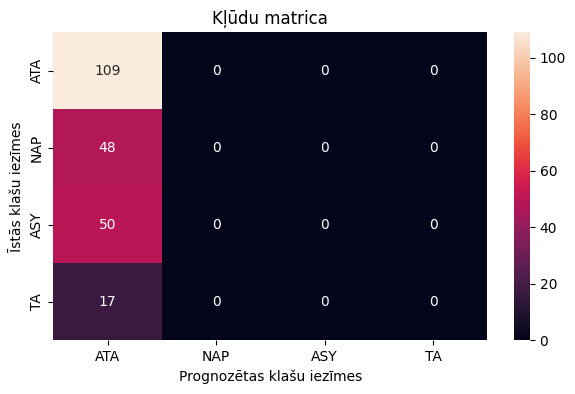

In [ ]:
#bibliotēku pievienošana algoritma veikuma novērtēšanai un izvadei
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pltb
#izmantojam apmācīto modeli ar testa kopu, lai iegūtu prognozes
y_prognoze = neironu_tikla_modelis.predict(X_testa)
#izvadām modeļa veikuma novērtējuma metrikas
print(classification_report(y_testa,y_prognoze, zero_division=0))
#veidojam kļūdu matricu
kludu_matrica = confusion_matrix(y_testa, y_prognoze)
#izvadām kļūdu matricu
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Prognozētas klašu iezīmes');
ax.set_ylabel('Īstās klašu iezīmes');
ax.set_title('Kļūdu matrica');
ax.xaxis.set_ticklabels(datu_kopa['ChestPainType'].unique());
ax.yaxis.set_ticklabels(datu_kopa['ChestPainType'].unique());

####**2.modelis** -viens slānis ar 5 neironiem

In [ ]:
#izveidojam mākslīgo neironu tīkla modeli ar 5 neironiem vienā slēptajā slānī
#Tiek uzdoti šādi parametri: maksimālais apmācības iterāciju skaits ir 50, aktivizācijas funkcija ir loģistiskā,
#svaru piemeklēšanas metode ir stohastiskais gradienta krītums, mācīšanās ātrums 0.2 un bez apmācības iterāciju izvades
neironu_tikla_modelis_1_slanis = MLPClassifier(hidden_layer_sizes=(5), max_iter=50, activation = 'logistic', solver='sgd', learning_rate_init = 0.2, verbose = 0)
#izveidotajam modelim tiek padotas apmācības datu kopas pazīmju vērtības un īstās izejas
neironu_tikla_modelis_1_slanis.fit(X_apmacibas, y_apmacibas)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=50, solver='sgd', verbose=0)

              precision    recall  f1-score   support

           0       0.53      0.99      0.69       109
           1       0.38      0.17      0.23        48
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00        17

    accuracy                           0.52       224
   macro avg       0.23      0.29      0.23       224
weighted avg       0.34      0.52      0.39       224



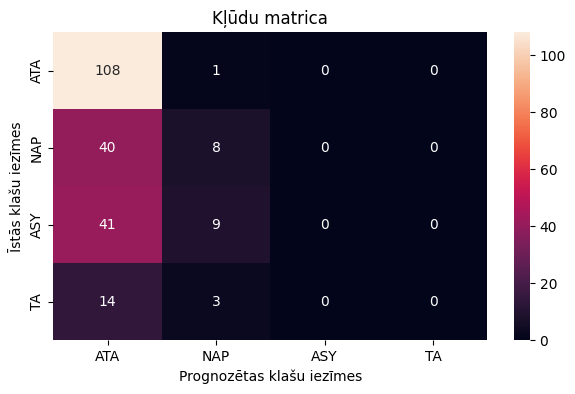

In [ ]:
y_prognoze_1_slanis = neironu_tikla_modelis_1_slanis.predict(X_testa)
print(classification_report(y_testa,y_prognoze_1_slanis, zero_division=0))
kludu_matrica = confusion_matrix(y_testa, y_prognoze_1_slanis)
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Prognozētas klašu iezīmes');
ax.set_ylabel('Īstās klašu iezīmes');
ax.set_title('Kļūdu matrica');
ax.xaxis.set_ticklabels(datu_kopa['ChestPainType'].unique());
ax.yaxis.set_ticklabels(datu_kopa['ChestPainType'].unique());

\Kļūdu matricā var redzēt, ka

kNN algoritms
---

In [ ]:
#algoritma izmantošanai nepieciešamās bibliotēkas ielāde
from sklearn.neighbors import KNeighborsClassifier
#Tiek izveidots algoritma modelis ar 5 kaimiņiem
KNN_MODEL = KNeighborsClassifier(n_neighbors=5)
#Padodam izveidotajam modelim apmācības datu kopu
KNN_MODEL.fit(X_apmacibas, y_apmacibas)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.56      0.84      0.68       109
           1       0.48      0.31      0.38        48
           2       0.30      0.18      0.23        50
           3       0.00      0.00      0.00        17

    accuracy                           0.52       224
   macro avg       0.34      0.33      0.32       224
weighted avg       0.45      0.52      0.46       224



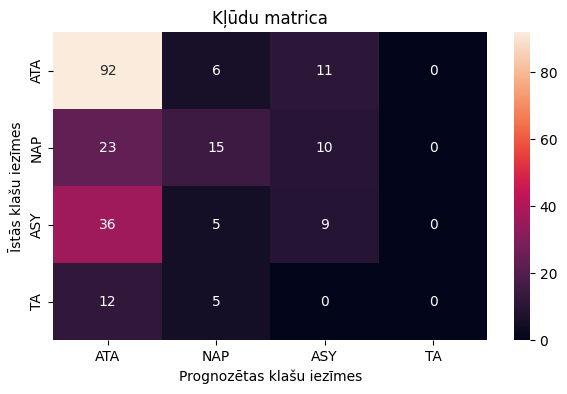

In [ ]:
#Nosakam klases iezīmes testa datu kopas datu objektiem
y_prognoze_knn = KNN_MODEL.predict(X_testa)
#izvadām modeļa veikuma novērtējuma metrikas
print(classification_report(y_testa,y_prognoze_knn, zero_division=0))
#veidojam kļūdu matricu
kludu_matrica = confusion_matrix(y_testa, y_prognoze_knn)
#izvadām kļūdu matricu
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Prognozētas klašu iezīmes');
ax.set_ylabel('Īstās klašu iezīmes');
ax.set_title('Kļūdu matrica');
ax.xaxis.set_ticklabels(datu_kopa['ChestPainType'].unique());
ax.yaxis.set_ticklabels(datu_kopa['ChestPainType'].unique());